## Importing libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

<ipython-input-37-f6677f1956ea>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


## Visualizing the data

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.shape

(271360, 8)

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


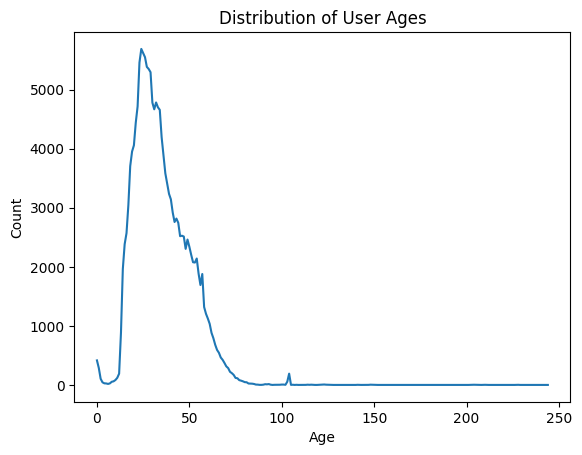

In [ ]:
age_counts = users['Age'].value_counts()    # counts the number of occurance of each age
age_counts = age_counts.sort_index()        # sorts the age in ascending order for the graph to look nice
plt.plot(age_counts.index,age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of User Ages')
plt.show()


So the above graph tell us that maximum readers are between the ages of 20-30.

In [ ]:
ratings['Book-Rating'].describe

<bound method NDFrame.describe of 0           0
1           5
2           0
3           3
4           6
           ..
1149775     9
1149776     0
1149777    10
1149778    10
1149779     8
Name: Book-Rating, Length: 1149780, dtype: int64>

so the ratings are between 0 to 10.

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
books=books.dropna()

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Now, no value in the books table is null

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


## Merging and observing

In [ ]:
book_ratings=books.merge(ratings,on='ISBN')
book_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


If the 'ratings' DataFrame has multiple rows with the same ISBN value, but the 'books' DataFrame has only one row with that ISBN value, the merge operation will still proceed.

The resulting merged DataFrame, book_ratings, will contain all the rows from the 'ratings' DataFrame that have a matching ISBN value in the 'books' DataFrame. However, since there is only one corresponding row in the 'books' DataFrame, that row will be duplicated for each matching row in the 'ratings' DataFrame.

In [ ]:
no_of_ratings=book_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
no_of_ratings.rename(columns={'Book-Rating':'No. of ratings'},inplace=True)
no_of_ratings.head()

,Book-Title,No. of ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


The term "inplace" in the context of pandas refers to performing an operation on a DataFrame or Series without creating a new object. Instead of returning a new modified DataFrame or Series, the original object is modified directly.

In [ ]:
avg_rating = book_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns={'Book-Rating':'Average-Rating'},inplace=True)
avg_rating.head()

<ipython-input-52-bc0ebd601f1d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating = book_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


reset_index() resets the index of the resulting Series to turn it into a DataFrame. The unique book titles become the 'Book-Title' column, and the average ratings become the 'Book-Rating' column

In [ ]:
combo=no_of_ratings.merge(avg_rating,on='Book-Title')
combo.head()

,Book-Title,No. of ratings,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [ ]:
combo=combo[combo['No. of ratings']>=250].sort_values('Average-Rating',ascending=False)

In [ ]:
combo = combo.merge(books, on ='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Image-URL-M','Book-Author']]
combo.head()

,Book-Title,Image-URL-M,Book-Author
0,Harry Potter and the Prisoner of Azkaban (Book 3),http://images.amazon.com/images/P/0439136350.0...,J. K. Rowling
3,Harry Potter and the Goblet of Fire (Book 4),http://images.amazon.com/images/P/0439139597.0...,J. K. Rowling
5,Harry Potter and the Sorcerer's Stone (Book 1),http://images.amazon.com/images/P/0590353403.0...,J. K. Rowling
9,Harry Potter and the Order of the Phoenix (Boo...,http://images.amazon.com/images/P/043935806X.0...,J. K. Rowling
13,Harry Potter and the Chamber of Secrets (Book 2),http://images.amazon.com/images/P/0439064872.0...,J. K. Rowling


In [ ]:
combo.shape

(186, 3)

## Most Rated 50 BOOKS
Most Rated: No. of ratings > 250

In [ ]:
combo.head(50)

,Book-Title,Image-URL-M,Book-Author
0,Harry Potter and the Prisoner of Azkaban (Book 3),http://images.amazon.com/images/P/0439136350.0...,J. K. Rowling
3,Harry Potter and the Goblet of Fire (Book 4),http://images.amazon.com/images/P/0439139597.0...,J. K. Rowling
5,Harry Potter and the Sorcerer's Stone (Book 1),http://images.amazon.com/images/P/0590353403.0...,J. K. Rowling
9,Harry Potter and the Order of the Phoenix (Boo...,http://images.amazon.com/images/P/043935806X.0...,J. K. Rowling
13,Harry Potter and the Chamber of Secrets (Book 2),http://images.amazon.com/images/P/0439064872.0...,J. K. Rowling
16,The Hobbit : The Enchanting Prelude to The Lor...,http://images.amazon.com/images/P/0345339681.0...,J.R.R. TOLKIEN
17,The Fellowship of the Ring (The Lord of the Ri...,http://images.amazon.com/images/P/0345339703.0...,J.R.R. TOLKIEN
26,Harry Potter and the Sorcerer's Stone (Harry P...,http://images.amazon.com/images/P/059035342X.0...,J. K. Rowling
28,"The Two Towers (The Lord of the Rings, Part 2)",http://images.amazon.com/images/P/0345339711.0...,J.R.R. TOLKIEN
39,To Kill a Mockingbird,http://images.amazon.com/images/P/0446310786.0...,Harper Lee


## Books rated by Educated Users
(Educated Users: who have rated more than 200 books)

### Finding educated users
( who have rated more than 200 books)

In [ ]:
user_ratings = users.merge(ratings, on ='User-ID')
user_ratings.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [ ]:
user = book_ratings.groupby('User-ID').count()['Book-Rating']>200
user.head()

User-ID
2     False
8     False
9     False
10    False
12    False
Name: Book-Rating, dtype: bool

In [ ]:
educated_users = user[user].index
educated_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

When you use the boolean indexing x[x] on the Series x, it filters the values based on the boolean condition x. The resulting Series will only contain the elements where the condition is True. The index values of these filtered elements will be retained.

In the context of the code snippet you provided, using x[x].index will return the index values of the filtered elements, which correspond to the users who have more than 200 ratings. It doesn't necessarily mean that the index values represent the User-IDs themselves. Instead, they represent the index values of the original Series or DataFrame that satisfy the condition.

### Books rated by educated users

In [ ]:
filtered_ratings = book_ratings[book_ratings['User-ID'].isin(educated_users)] # calculates that out of all the books in the "Books.csv" which ones have been rated by users which have rated more than 300 books.
filtered_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10


In [ ]:
filtered_ratings.shape

(474003, 10)

calculates that out of all the books in the "Books.csv" which ones have been rated by users which have rated more than 200 books.
filtered_ratings.head()
here there is repitition, i.e. if there is one book which has 2 users who have rated more than 200 books then that book will come twice in this table

In [ ]:
books_by_educated_users = filtered_ratings.groupby('Book-Title').agg({
    'ISBN':'unique',
    'Image-URL-M':'unique',
    'Book-Author':'unique',
    'Year-Of-Publication':'unique',
    'Publisher':'unique',
    'User-ID':'unique',
    'Book-Rating':'mean'
}).reset_index()
books_by_educated_users.head()

,Book-Title,ISBN,Image-URL-M,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,[0590567330],[http://images.amazon.com/images/P/0590567330....,[Karen Hesse],[1999],[Hyperion Books for Children],"[35859, 96448]",4.5
1,Always Have Popsicles,[0964147726],[http://images.amazon.com/images/P/0964147726....,[Rebecca Harvin],[1994],[Rebecca L. Harvin],[172742],0.0
2,Apple Magic (The Collector's series),[0942320093],[http://images.amazon.com/images/P/0942320093....,[Martina Boudreau],[1984],[Amer Cooking Guild],[198711],0.0
3,Beyond IBM: Leadership Marketing and Finance ...,[0962295701],[http://images.amazon.com/images/P/0962295701....,[Lou Mobley],[1989],"[Teleonet, Incorporated]",[11601],0.0
4,Clifford Visita El Hospital (Clifford El Gran...,[0439188970],[http://images.amazon.com/images/P/0439188970....,[Norman Bridwell],[2000],[Scholastic],[216683],0.0


Now, there is no repitition.

In [ ]:
books_by_educated_users.shape

(155842, 8)

As one can see in the earlier table, 474003-173127 = 300876 values were repeated.
So, we have 173127 books in our dataset which have been rated by educated users.

## Finding good books rated by educated users
(good books : have avg rating>5 & No. of ratings>50)

In [ ]:
help_good_books=no_of_ratings.merge(avg_rating,on='Book-Title')
good_books = help_good_books[help_good_books['Average-Rating']>5]
good_book_true = good_books[good_books['No. of ratings']>=50]

In [ ]:
good_book_true

,Book-Title,No. of ratings,Average-Rating
2452,A Clockwork Orange (Norton Paperback Fiction),52,5.019231
11213,All I Need to Know I Learned from My Cat,63,5.238095
33591,Charlie and the Chocolate Factory,71,5.070423
60580,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
65422,Fear and Loathing in Las Vegas : A Savage Jour...,57,5.385965
70394,Free,56,8.017857
77810,Griffin &amp; Sabine: An Extraordinary Corresp...,72,6.041667
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441


In [ ]:
good_book_true.shape

(26, 3)

In [ ]:
good_books_by_educated_users = good_book_true[good_book_true['Book-Title'].isin(books_by_educated_users['Book-Title'])]
good_books_by_educated_users.shape

(26, 3)

So, we can conclude that all the books which have an average rating of more than 5 with more than 50 ratings, have been rated by educated users.

## Collaborative model
Gives you similar books related to the book which you given as an input

In [ ]:
filtered_model = book_ratings[book_ratings['User-ID'].isin(educated_users)]       # finds out of all the books in our dataset which have been rated by educated users.
filtered_model.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10


In [ ]:
y = filtered_model.groupby('Book-Title').count()['Book-Rating']>=50   # finds the books which have atleast 50 ratings by different users
famous_books=y[y].index
famous_books.shape

(706,)

final_ratings gives us the books which have been rated by more than atleast 50 people and among the people who have rated the book, are also educated users.

In [ ]:
final_ratings = filtered_model[filtered_model['Book-Title'].isin(famous_books)]
final_ratings.shape

(58586, 10)

In [ ]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pt.fillna(0,inplace=True)
pt.head()


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pt.shape

(706, 810)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(pt)
print("Similarity Matrix: \n\n{}".format(similarity_matrix))

Similarity Matrix: 

[[1.         0.10255025 0.01220856 ... 0.12110367 0.07347567 0.04316046]
 [0.10255025 1.         0.2364573  ... 0.07446129 0.16773875 0.14263397]
 [0.01220856 0.2364573  1.         ... 0.04558758 0.04938579 0.10796119]
 ...
 [0.12110367 0.07446129 0.04558758 ... 1.         0.07085128 0.0196177 ]
 [0.07347567 0.16773875 0.04938579 ... 0.07085128 1.         0.10602962]
 [0.04316046 0.14263397 0.10796119 ... 0.0196177  0.10602962 1.        ]]


Books with the most similar rating patterns by different users will be considered the most similar according to the cosine similarity metric.

In [ ]:
def knn_recommend(book_name, k=5):

  # Find the index of the input book
  index = np.where(pt.index == book_name)[0][0]

  # Get the similarity scores for the input book
  similar_books = similarity_matrix[index]

  # Getting the top k similar books
  top_similar_indices_of_books = np.argsort(similar_books)[::-1][:k]

  # Getting the index of the top k similar books from the 'pt' table
  top_similar_books = pt.index[top_similar_indices_of_books]

  # return the top similar books
  return top_similar_books.tolist()

In [ ]:
# Taking input from user
user_book = input("Enter the name of the book for which you want to find similar books: ")
no_of_similar_books = int(input("Enter the number of similar books you want to find: "))

Enter the name of the book for which you want to find similar books: Harry Potter and the Goblet of Fire (Book 4)
Enter the number of similar books you want to find: 10


In [ ]:
recommend_books = knn_recommend(user_book, no_of_similar_books)
print("Recommended books similar to {} are: \n".format(user_book))
for book in recommend_books:
  print(book)

Recommended books similar to Harry Potter and the Goblet of Fire (Book 4) are: 

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Remember Me
Bridget Jones's Diary
Wicked: The Life and Times of the Wicked Witch of the West
